<h2>Part A: Linear Classification Models

<h5>Data Preparation

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torch.utils.data import ConcatDataset, Subset
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))]) #flatten 28*28 to 784 features

train_data_MNIST = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data_MNIST  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

full_data_MNIST = ConcatDataset([train_data_MNIST, test_data_MNIST])
targets = np.concatenate((train_data_MNIST.targets.numpy(),test_data_MNIST.targets.numpy()))
indices = np.arange(len(targets))

train_idx, temp_idx, y_train, y_temp = train_test_split(indices, targets, test_size=0.4, stratify=targets, random_state=42)
val_idx, test_idx, y_val, y_test = train_test_split(temp_idx, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

train_dataset = Subset(full_data_MNIST, train_idx)
val_dataset   = Subset(full_data_MNIST, val_idx)
test_dataset  = Subset(full_data_MNIST, test_idx)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

mask = (targets == 0) | (targets == 1)
filtered_indices = indices[mask]
filtered_targets = targets[mask]
train_idx_bin, temp_idx_bin, y_train_bin, y_temp_bin = train_test_split(filtered_indices, filtered_targets,test_size=0.4, stratify=filtered_targets, random_state=42)
val_idx_bin, test_idx_bin, y_val_bin, y_test_bin = train_test_split(temp_idx_bin, y_temp_bin,test_size=0.5, stratify=y_temp_bin, random_state=42)

train_dataset_bin = Subset(full_data_MNIST, train_idx_bin)
val_dataset_bin   = Subset(full_data_MNIST, val_idx_bin)
test_dataset_bin = Subset(full_data_MNIST, test_idx_bin)

train_loader_bin = DataLoader(train_dataset_bin, batch_size=64, shuffle=True)
val_loader_bin = DataLoader(val_dataset_bin, batch_size=64, shuffle=False)
test_loader_bin = DataLoader(test_dataset_bin, batch_size=64, shuffle=False)



<h3>Logistic Regression Implementation

<h5>Binary Classification Task

In [ ]:
import torch

class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Define the single linear layer
        self.linear = nn.Linear(784, 1)
    def forward(self, x):
        # Pass input x through the linear layer
        outputs = self.linear(x)
        # Return the outputs
        return outputs
    
model = LogisticRegression()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 30
train_loss_history = []
val_loss_history = []
val_acc_history = []
train_acc_history = []

for epoch in range(num_epochs):
    
    model.train() 
    train_loss = 0.0
    train_samples = 0
    train_correct_preds = 0
    for images, labels in train_loader_bin:
       optimizer.zero_grad()
       outputs = model(images)
       labels_reshaped = labels.float().view(-1, 1)
       loss = criterion(outputs, labels_reshaped)
       loss.backward()
       optimizer.step()
       train_loss += loss.item() * images.size(0)
       train_samples += labels.size(0)
       predicted_classes = (outputs > 0)
       train_correct_preds += (predicted_classes == labels_reshaped).sum().item()
      
    avg_train_loss = train_loss / train_samples
    train_accuracy = train_correct_preds / train_samples

    train_acc_history.append(train_accuracy)
    train_loss_history.append(avg_train_loss)

    
    model.eval() 
    val_loss = 0.0
    correct_preds = 0
    total_samples = 0
    # We don't need gradients for validation
    with torch.no_grad():
        for images, labels in val_loader_bin:
            outputs = model(images)
            
            labels_reshaped = labels.float().view(-1, 1)
            loss = criterion(outputs, labels_reshaped)
            val_loss += loss.item() * images.size(0)
            
            predicted_classes = (outputs > 0)
            correct_preds += (predicted_classes == labels_reshaped).sum().item()
            total_samples += labels.size(0)
    avg_val_loss = val_loss / total_samples
    val_accuracy = correct_preds / total_samples
    
    val_loss_history.append(avg_val_loss)
    val_acc_history.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: ..., Train Accuracy: ..., Val Loss: ..., Val Accuracy: ...')
    print(f"Epoch [{epoch+1}/{num_epochs}] | " f"Train Loss: {avg_train_loss:.4f} | " f"Train Acc: {train_accuracy*100:.2f}| "f"Val Loss: {avg_val_loss:.4f} | " f"Val Acc: {val_accuracy*100:.2f}%")



Epoch [1/30], Train Loss: ..., Train Accuracy: ..., Val Loss: ..., Val Accuracy: ...
Epoch [1/30] | Train Loss: 0.2107 | Train Acc: 98.77| Val Loss: 0.0939 | Val Acc: 99.42%
Epoch [2/30], Train Loss: ..., Train Accuracy: ..., Val Loss: ..., Val Accuracy: ...
Epoch [2/30] | Train Loss: 0.0699 | Train Acc: 99.65| Val Loss: 0.0559 | Val Acc: 99.53%
Epoch [3/30], Train Loss: ..., Train Accuracy: ..., Val Loss: ..., Val Accuracy: ...
Epoch [3/30] | Train Loss: 0.0468 | Train Acc: 99.67| Val Loss: 0.0416 | Val Acc: 99.59%
Epoch [4/30], Train Loss: ..., Train Accuracy: ..., Val Loss: ..., Val Accuracy: ...
Epoch [4/30] | Train Loss: 0.0365 | Train Acc: 99.68| Val Loss: 0.0340 | Val Acc: 99.63%
Epoch [5/30], Train Loss: ..., Train Accuracy: ..., Val Loss: ..., Val Accuracy: ...
Epoch [5/30] | Train Loss: 0.0306 | Train Acc: 99.73| Val Loss: 0.0292 | Val Acc: 99.66%
Epoch [6/30], Train Loss: ..., Train Accuracy: ..., Val Loss: ..., Val Accuracy: ...
Epoch [6/30] | Train Loss: 0.0267 | Train Acc

<h4> Test evaluation

In [6]:
model.eval() # Set model to evaluation mode
test_correct_preds = 0
test_total_samples = 0
all_preds = []
all_labels = []

with torch.no_grad(): 
    
    for images, labels in test_loader_bin: 
        
        # Get model outputs
        outputs = model(images)
        labels_reshaped = labels.float().view(-1, 1)
        
       
        predicted_classes = (outputs > 0)
        
        # Add to total correct predictions
        test_correct_preds += (predicted_classes == labels_reshaped).sum().item()
        test_total_samples += labels.size(0)
        
        # --- Store for Confusion Matrix ---
        # .cpu() moves data from GPU (if used) back to CPU
        all_preds.extend(predicted_classes.cpu().numpy())
        all_labels.extend(labels_reshaped.cpu().numpy())

# Calculate and print final test accuracy
final_test_accuracy = test_correct_preds / test_total_samples
print(f"Final Test Accuracy: {final_test_accuracy * 100:.2f}%")

Final Test Accuracy: 99.76%


<h3>Confusion matrix

In [7]:
tp = 0 
tn = 0 
fp = 0 
fn = 0 

for pred, label in zip(all_preds, all_labels):
    if pred == True and label == 1.0:
        tp += 1
    elif pred == False and label == 0.0:
        tn += 1
    elif pred == True and label == 0.0:
        fp += 1
    elif pred == False and label == 1.0:
        fn += 1

print("\n Confusion Matrix Manual")
print("                     Predicted")
print("                    NEG (0) | POS (1)")
print("---------------------------------------")
print(f"Actual NEG (0) |  {tn:^6}  |  {fp:^6}")
print("---------------------------------------")
print(f"Actual POS (1) |  {fn:^6}  |  {tp:^6}")
print("---------------------------------------")
acc = (tp + tn) / (tp + tn + fp + fn)
print(f"\nAccuracy from CM: {acc * 100:.2f}%")


 Confusion Matrix Manual
                     Predicted
                    NEG (0) | POS (1)
---------------------------------------
Actual NEG (0) |   1377   |    4   
---------------------------------------
Actual POS (1) |    3     |   1572 
---------------------------------------

Accuracy from CM: 99.76%


<h3>plot Curves

<h3>1.training vs validation loss

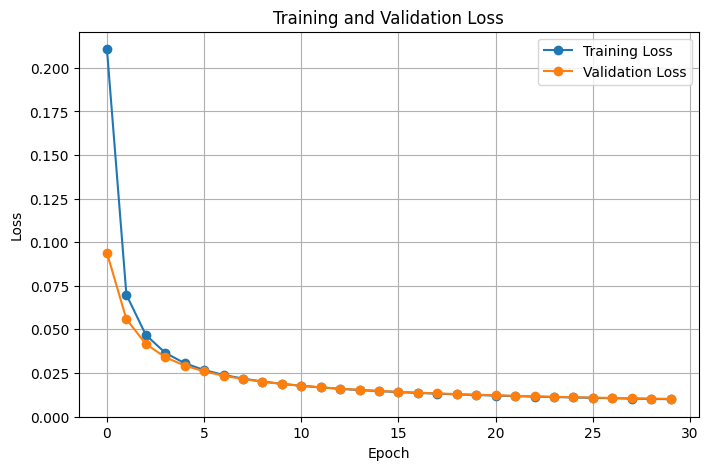

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(train_loss_history, label='Training Loss', marker='o')
plt.plot(val_loss_history, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


<h3>2.Training and validation accuracy

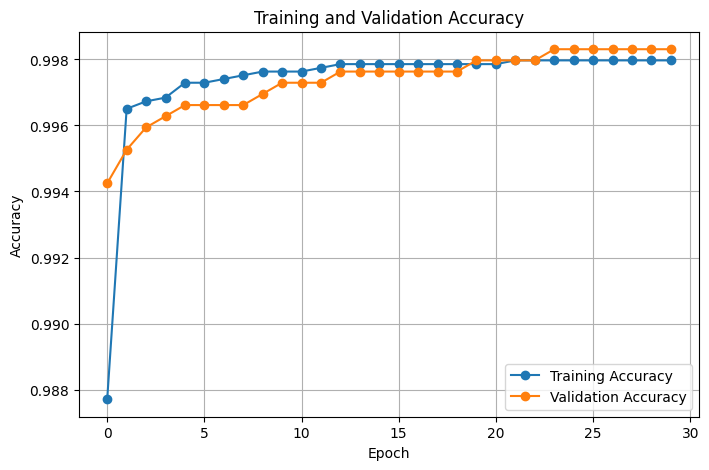

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(train_acc_history, label='Training Accuracy', marker='o')
plt.plot(val_acc_history, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


<h4>Softmax regression

In [10]:
import torch.nn as nn

class SoftmaxRegression(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear = nn.Linear(784, 10) 
    
    def forward(self, x):
        outputs = self.linear(x)
        return outputs
model = SoftmaxRegression()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

num_epochs = 30 # Or as needed

for epoch in range(num_epochs):
    
    #  TRAINING PHASE
    model.train()
    train_loss = 0.0
    train_correct_preds = 0
    train_samples = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
        train_samples += labels.size(0)

        predicted_classes = torch.argmax(outputs, dim=1)

        train_correct_preds += (predicted_classes == labels).sum().item()
    avg_train_loss = train_loss / train_samples
    avg_train_acc = train_correct_preds / train_samples
    train_loss_history.append(avg_train_loss)
    train_acc_history.append(avg_train_acc)
    model.eval()
    val_loss = 0.0
    val_correct_preds = 0
    val_samples = 0
    with torch.no_grad():
        
        for images, labels in val_loader:
            outputs = model(images)
            
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            
            predicted_classes = torch.argmax(outputs, dim=1)
            val_correct_preds += (predicted_classes == labels).sum().item()
            val_samples += labels.size(0)
            
    avg_val_loss = val_loss / val_samples
    avg_val_acc = val_correct_preds / val_samples
    val_loss_history.append(avg_val_loss)
    val_acc_history.append(avg_val_acc)
    
    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {avg_train_loss:.4f} | "
          f"Train Acc: {avg_train_acc*100:.2f}% | "
          f"Val Loss: {avg_val_loss:.4f} | "
          f"Val Acc: {avg_val_acc*100:.2f}%")

Epoch [1/30] | Train Loss: 1.1115 | Train Acc: 78.12% | Val Loss: 0.7171 | Val Acc: 84.45%
Epoch [2/30] | Train Loss: 0.6186 | Train Acc: 85.91% | Val Loss: 0.5584 | Val Acc: 86.59%
Epoch [3/30] | Train Loss: 0.5179 | Train Acc: 87.30% | Val Loss: 0.4946 | Val Acc: 87.51%
Epoch [4/30] | Train Loss: 0.4692 | Train Acc: 88.16% | Val Loss: 0.4585 | Val Acc: 88.11%
Epoch [5/30] | Train Loss: 0.4394 | Train Acc: 88.61% | Val Loss: 0.4344 | Val Acc: 88.61%
Epoch [6/30] | Train Loss: 0.4187 | Train Acc: 89.07% | Val Loss: 0.4173 | Val Acc: 88.93%
Epoch [7/30] | Train Loss: 0.4030 | Train Acc: 89.31% | Val Loss: 0.4045 | Val Acc: 89.09%
Epoch [8/30] | Train Loss: 0.3910 | Train Acc: 89.52% | Val Loss: 0.3938 | Val Acc: 89.34%
Epoch [9/30] | Train Loss: 0.3811 | Train Acc: 89.78% | Val Loss: 0.3854 | Val Acc: 89.63%
Epoch [10/30] | Train Loss: 0.3729 | Train Acc: 89.92% | Val Loss: 0.3782 | Val Acc: 89.66%
Epoch [11/30] | Train Loss: 0.3658 | Train Acc: 90.09% | Val Loss: 0.3723 | Val Acc: 89.8

<h4> Test evaluation

In [11]:
model.eval() # Set model to evaluation mode
test_correct_preds = 0
test_total_samples = 0
all_preds = []
all_labels = []

with torch.no_grad(): 
    
    for images, labels in test_loader: 
        
        # Get model outputs
        outputs = model(images)
        
       
        predicted_classes = torch.argmax(outputs, dim=1)
        test_correct_preds += (predicted_classes == labels).sum().item()
        test_total_samples += labels.size(0)
        
        # for confusion Matrix 
        # .cpu() moves data from GPU (if used) back to CPU
        all_preds.extend(predicted_classes.cpu())
        all_labels.extend(labels.cpu())

# Calculate and print final test accuracy
final_test_accuracy = test_correct_preds / test_total_samples
print(f"Final Test Accuracy: {final_test_accuracy * 100:.2f}%")

Final Test Accuracy: 90.93%


In [12]:


# initialize a 10x10 matrix of zeros
confusion_matrix = torch.zeros((10, 10), dtype=torch.int64)

# Loop through all the collected predictions and labels
for label, pred in zip(all_labels, all_preds):
    # Increment the count at the (actual, predicted) cell
    confusion_matrix[label, pred] += 1 

print("\n Confusion Matrix Manual")
print(confusion_matrix)

correct_per_class = confusion_matrix.diag()

# Get the total number of samples for each class (the row sums)
total_per_class = confusion_matrix.sum(dim=1)

# calculate the accuracy for each class
# Add 1e-6 to avoid division by zero if a class has no samples
per_class_accuracy = correct_per_class.float() / (total_per_class.float() + 1e-6)

print("\n--- Per-Class Accuracy ---")
for i in range(10):
    print(f"Class {i}: {per_class_accuracy[i] * 100:.2f}%")


 Confusion Matrix Manual
tensor([[1332,    0,    7,    3,    2,    9,    9,    1,   15,    2],
        [   1, 1525,    6,    8,    1,   10,    1,    3,   18,    2],
        [  11,   12, 1225,   24,   28,    2,   26,   27,   31,   12],
        [   8,   12,   25, 1256,    3,   48,   10,   25,   31,   11],
        [   3,    9,    6,    3, 1259,    0,   13,    4,   10,   58],
        [  19,   10,   16,   42,   11, 1072,   32,    6,   41,   14],
        [  13,    4,   12,    1,    8,   15, 1308,    3,   11,    0],
        [   8,   12,   16,    9,   11,    1,    0, 1345,    5,   52],
        [  16,   36,   15,   31,    8,   36,   13,   12, 1184,   14],
        [  12,    6,    8,   19,   58,    9,    3,   42,   10, 1224]])

--- Per-Class Accuracy ---
Class 0: 96.52%
Class 1: 96.83%
Class 2: 87.63%
Class 3: 87.89%
Class 4: 92.23%
Class 5: 84.88%
Class 6: 95.13%
Class 7: 92.19%
Class 8: 86.74%
Class 9: 87.99%


<h3>plot Curves

<h3>1.training vs validation loss

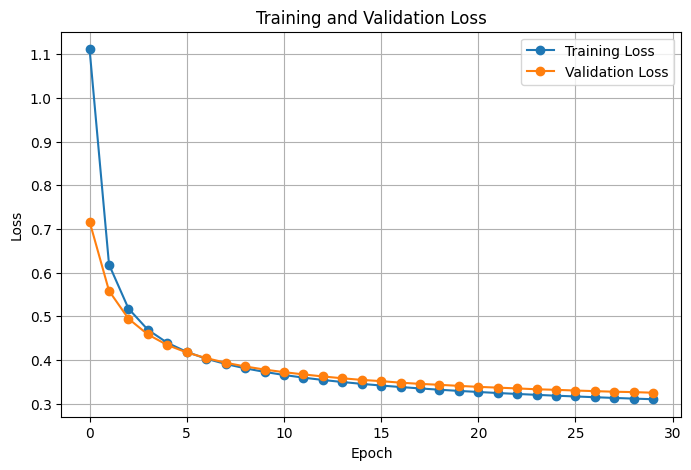

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(train_loss_history, label='Training Loss', marker='o')
plt.plot(val_loss_history, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


<h3>2.Training and validation accuracy

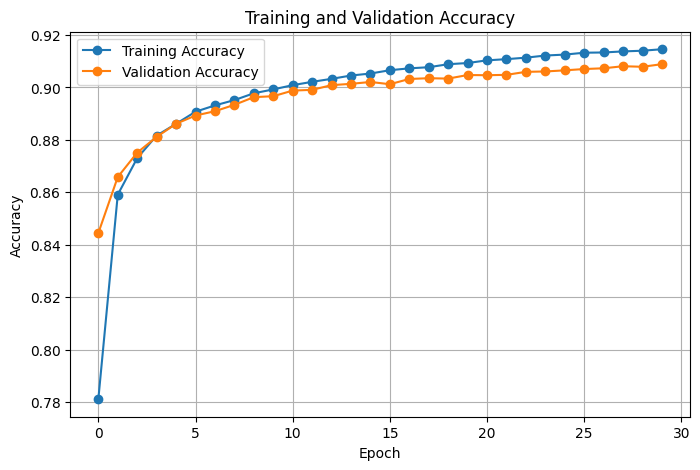

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(train_acc_history, label='Training Accuracy', marker='o')
plt.plot(val_acc_history, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Part B: Neural Network Implementation

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class SimpleFNN(nn.Module):
    def __init__(self,num_classes=10):
        super(SimpleFNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, num_classes)
        # --- Weight Initialization ---
        nn.init.kaiming_normal_(self.fc1.weight)
        nn.init.kaiming_normal_(self.fc2.weight)
        nn.init.xavier_normal_(self.fc3.weight)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x= F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [16]:
import torchvision
import torchvision.transforms as transforms

# Define the transform: Convert images to PyTorch Tensors
transform = transforms.ToTensor()
# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

In [17]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64
train=DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test=DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [18]:
import torch.optim as optim


model = SimpleFNN()
model.to(device)

loss=nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


In [19]:
NUM_EPOCHS = 12
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
for epoch in range(NUM_EPOCHS):
    model.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    for images,labels in train:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs=model(images)

        l=loss(outputs,labels)
        l.backward()
        optimizer.step()
        
        running_loss += l.item()
        # Get training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
   
    epoch_loss = running_loss / len(train)
    train_loss_history.append(epoch_loss)
    epoch_train_acc = 100 * train_correct / train_total
    train_acc_history.append(epoch_train_acc)


    model.eval() 
    correct = 0
    total = 0
    val_running_loss = 0.0

    with torch.no_grad(): 
        for images, labels in test: 
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            l= loss(outputs, labels) 
            val_running_loss += l.item()
            correct+=(predicted==labels).sum().item()

    epoch_val_loss = val_running_loss / len(test)
    epoch_val_acc = 100 * correct / total

    val_loss_history.append(epoch_val_loss)
    val_acc_history.append(epoch_val_acc)

    print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], '
      f'Train Loss: {epoch_loss:.4f}, '
      f'Train Acc: {epoch_train_acc:.2f}%, '
      f'Val Loss: {epoch_val_loss:.4f}, '
      f'Val Acc: {epoch_val_acc:.2f}%')

Epoch [1/12], Train Loss: 0.3227, Train Acc: 90.51%, Val Loss: 0.1648, Val Acc: 95.14%
Epoch [2/12], Train Loss: 0.1445, Train Acc: 95.72%, Val Loss: 0.1145, Val Acc: 96.45%
Epoch [3/12], Train Loss: 0.1034, Train Acc: 96.86%, Val Loss: 0.1072, Val Acc: 96.54%
Epoch [4/12], Train Loss: 0.0796, Train Acc: 97.60%, Val Loss: 0.0836, Val Acc: 97.32%
Epoch [5/12], Train Loss: 0.0655, Train Acc: 98.05%, Val Loss: 0.0827, Val Acc: 97.57%
Epoch [6/12], Train Loss: 0.0547, Train Acc: 98.34%, Val Loss: 0.0817, Val Acc: 97.44%
Epoch [7/12], Train Loss: 0.0454, Train Acc: 98.66%, Val Loss: 0.0846, Val Acc: 97.37%
Epoch [8/12], Train Loss: 0.0382, Train Acc: 98.86%, Val Loss: 0.0727, Val Acc: 97.81%
Epoch [9/12], Train Loss: 0.0315, Train Acc: 99.08%, Val Loss: 0.0694, Val Acc: 97.87%
Epoch [10/12], Train Loss: 0.0273, Train Acc: 99.21%, Val Loss: 0.0686, Val Acc: 97.82%
Epoch [11/12], Train Loss: 0.0229, Train Acc: 99.41%, Val Loss: 0.0640, Val Acc: 97.81%
Epoch [12/12], Train Loss: 0.0184, Train 

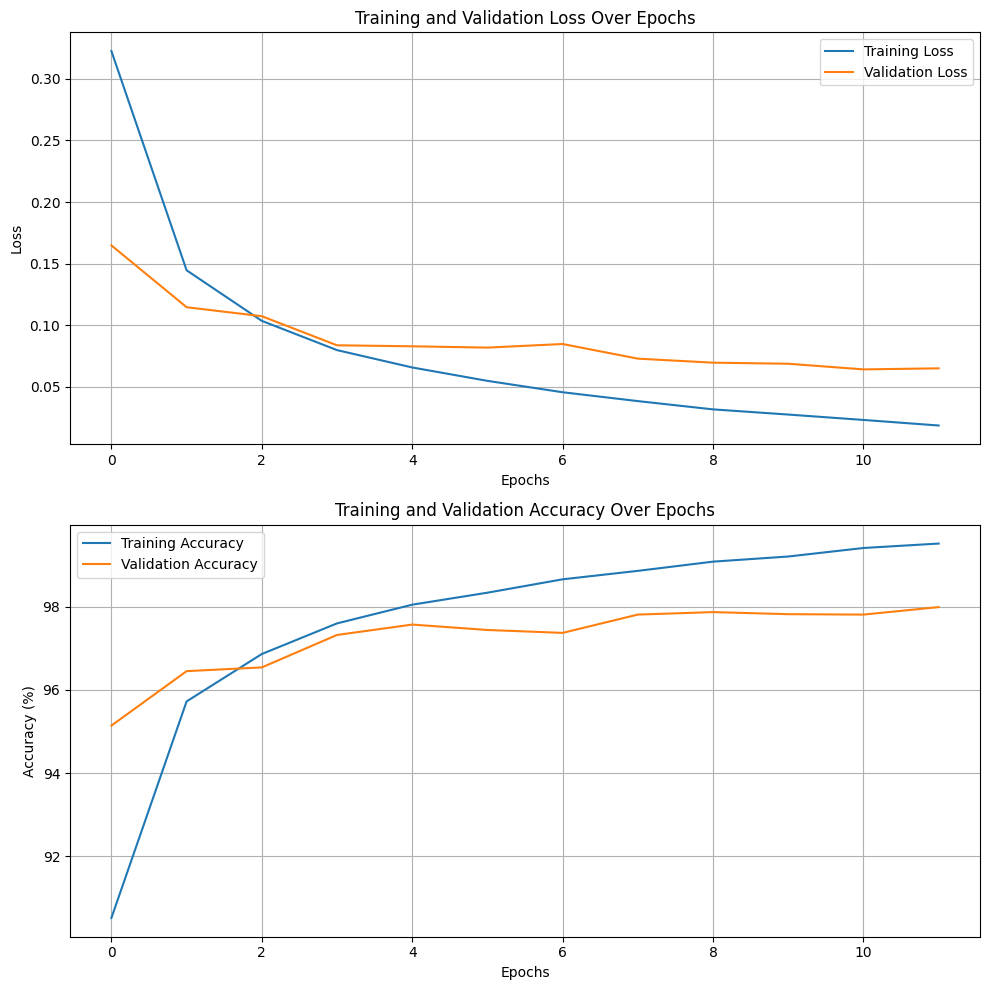

In [20]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot 1: Training & Validation Loss
ax1.plot(train_loss_history, label='Training Loss')
ax1.plot(val_loss_history, label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Over Epochs')
ax1.legend()
ax1.grid(True)

# Plot 2: Training & Validation Accuracy
ax2.plot(train_acc_history, label='Training Accuracy')
ax2.plot(val_acc_history, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training and Validation Accuracy Over Epochs')
ax2.legend()
ax2.grid(True)


plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

# Part C: Comprehensive Analysis

### 1. setup

In [49]:
def test_model_simpleFNN(l_r,b_size,hidden_sizes,n_epochs, testing = False):
    # flexible model class
    class SimpleFNN_modified(nn.Module):
        def __init__(self,num_classes=10):
            super(SimpleFNN_modified, self).__init__()
            layers = []
            prev_size = 784
            for h_size in hidden_sizes:
                layers.append(nn.Linear(prev_size,h_size))
                prev_size = h_size
            self.hidden_layers = nn.ModuleList(layers)
            self.out_layer = nn.Linear(prev_size,num_classes) 
            # self.fc1 = nn.Linear(784, 128)
            # self.fc2 = nn.Linear(128, 256)
            # self.fc3 = nn.Linear(256, num_classes)
            # --- Weight Initialization ---
            for layer in self.hidden_layers:
                nn.init.kaiming_normal_(layer.weight)
            nn.init.xavier_normal_(self.out_layer.weight)
            # nn.init.kaiming_normal_(self.fc1.weight)
            # nn.init.kaiming_normal_(self.fc2.weight)
            # nn.init.xavier_normal_(self.fc3.weight)
        def forward(self, x):
            x = x.view(-1, 784)
            # x = F.relu(self.fc1(x))
            # x= F.relu(self.fc2(x))
            for layer in self.hidden_layers:
                x = F.relu(layer(x))
            x = self.out_layer(x)
            return x
    # dataset creation
    transform = transforms.ToTensor()
    train_data_MNIST = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_data_MNIST  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    full_data_MNIST = ConcatDataset([train_data_MNIST, test_data_MNIST])
    targets = np.concatenate((train_data_MNIST.targets.numpy(),test_data_MNIST.targets.numpy()))
    indices = np.arange(len(targets))

    train_idx, temp_idx, y_train, y_temp = train_test_split(indices, targets, test_size=0.4, stratify=targets, random_state=42)
    val_idx, test_idx, y_val, y_test = train_test_split(temp_idx, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

    train_dataset = Subset(full_data_MNIST, train_idx)
    val_dataset   = Subset(full_data_MNIST, val_idx)
    test_dataset  = Subset(full_data_MNIST, test_idx)

    train_loader = DataLoader(train_dataset, batch_size=b_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=b_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=b_size, shuffle=False)
    # model instance
    model = SimpleFNN_modified()
    model.to(device)

    loss=nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=l_r, momentum=0.9)
    # testing 
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []
    for epoch in range(n_epochs):
        model.train()
        running_loss = 0.0
        train_correct = 0
        train_total = 0
        for images,labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs=model(images)

            l=loss(outputs,labels)
            l.backward()
            optimizer.step()
            
            running_loss += l.item()
            # Get training accuracy
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
    
        epoch_loss = running_loss / len(train_loader)
        train_loss_history.append(epoch_loss)
        epoch_train_acc = 100 * train_correct / train_total
        train_acc_history.append(epoch_train_acc)


        model.eval() 
        correct = 0
        total = 0
        val_running_loss = 0.0

        with torch.no_grad(): 
            for images, labels in val_loader: 
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                l= loss(outputs, labels) 
                val_running_loss += l.item()
                correct+=(predicted==labels).sum().item()

        epoch_val_loss = val_running_loss / len(val_loader)
        epoch_val_acc = 100 * correct / total

        val_loss_history.append(epoch_val_loss)
        val_acc_history.append(epoch_val_acc)

        print(f'Epoch [{epoch+1}/{n_epochs}], '
        f'Train Loss: {epoch_loss:.4f}, '
        f'Train Acc: {epoch_train_acc:.2f}%, '
        f'Val Loss: {epoch_val_loss:.4f}, '
        f'Val Acc: {epoch_val_acc:.2f}%')
        
    # testing mode only
    test_loss_history = []
    test_acc_history = []
    test_y_true = []
    test_y_pred =  []

    if testing:
        model.eval()
        correct = 0
        total = 0
        test_loss = 0
        with torch.no_grad():
            for image, label in test_loader:
                image  = image.to(device)
                label = label.to(device)
                outputs = model(image)
                loss_val = loss(outputs, label)
                test_loss += loss_val.item()
                _, preds = torch.max(outputs.data, 1)
                total += label.size(0)
                correct += (preds == label).sum().item()
                test_y_true.extend(label.cpu().numpy())
                test_y_pred.extend(preds.cpu().numpy())
                
        test_acc = 100 * correct / total
        test_loss = test_loss / len(test_loader)
        test_acc_history.append(test_acc)
        test_loss_history.append(test_loss)

        print(f"Final Test Accuracy: {test_acc:.2f}%, Test Loss: {test_loss:.4f}")

    return train_loss_history, val_loss_history, train_acc_history, val_acc_history, model, test_loss_history, test_acc_history,  test_y_true, test_y_pred
    

        

### c1. hyperparameter analysis

#### learning rate

In [25]:
rates = [0.001, 0.01, 0.1, 1.0]
results_lr = {}
for lr in rates:
    print(f"\t * Training with learning rate = {lr} *")
    train_loss, val_loss, train_acc, val_acc, model = test_model_simpleFNN(l_r=lr, b_size=64, hidden_sizes=[128,256], n_epochs=8)
    results_lr[lr] = {
        "train_loss": train_loss,
        "val_loss": val_loss,
        "train_acc": train_acc,
        "val_acc": val_acc
    }

	 * Training with learning rate = 0.001 *
Epoch [1/8], Train Loss: 0.8917, Train Acc: 76.34%, Val Loss: 0.4439, Val Acc: 88.09%
Epoch [2/8], Train Loss: 0.3772, Train Acc: 89.39%, Val Loss: 0.3438, Val Acc: 90.33%
Epoch [3/8], Train Loss: 0.3108, Train Acc: 91.10%, Val Loss: 0.3020, Val Acc: 91.55%
Epoch [4/8], Train Loss: 0.2764, Train Acc: 92.04%, Val Loss: 0.2765, Val Acc: 92.16%
Epoch [5/8], Train Loss: 0.2513, Train Acc: 92.79%, Val Loss: 0.2576, Val Acc: 92.72%
Epoch [6/8], Train Loss: 0.2330, Train Acc: 93.29%, Val Loss: 0.2425, Val Acc: 93.19%
Epoch [7/8], Train Loss: 0.2169, Train Acc: 93.86%, Val Loss: 0.2323, Val Acc: 93.39%
Epoch [8/8], Train Loss: 0.2030, Train Acc: 94.25%, Val Loss: 0.2208, Val Acc: 93.76%
	 * Training with learning rate = 0.01 *
Epoch [1/8], Train Loss: 0.3735, Train Acc: 88.91%, Val Loss: 0.2085, Val Acc: 93.98%
Epoch [2/8], Train Loss: 0.1669, Train Acc: 95.14%, Val Loss: 0.1651, Val Acc: 95.02%
Epoch [3/8], Train Loss: 0.1208, Train Acc: 96.45%, Val L

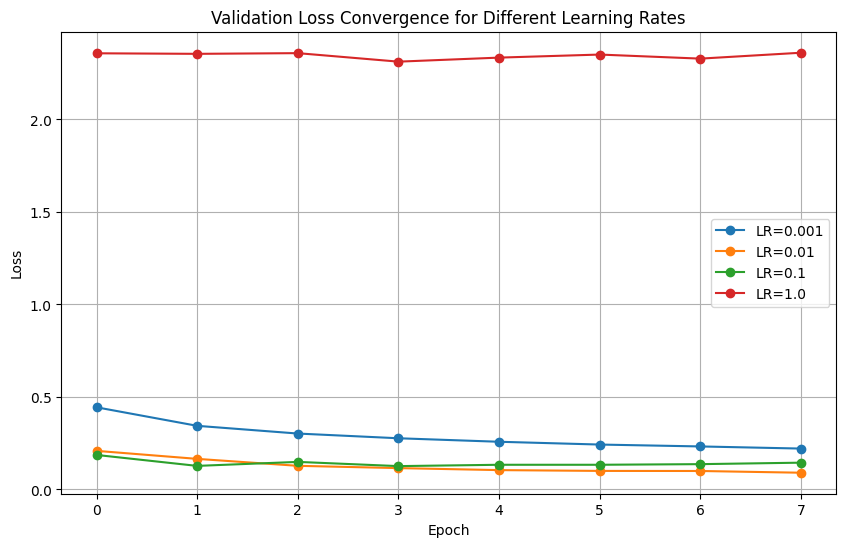

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for lr, history in results_lr.items():
    plt.plot(history["val_loss"], marker='o', label=f"LR={lr}")
plt.title("Validation Loss Convergence for Different Learning Rates")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


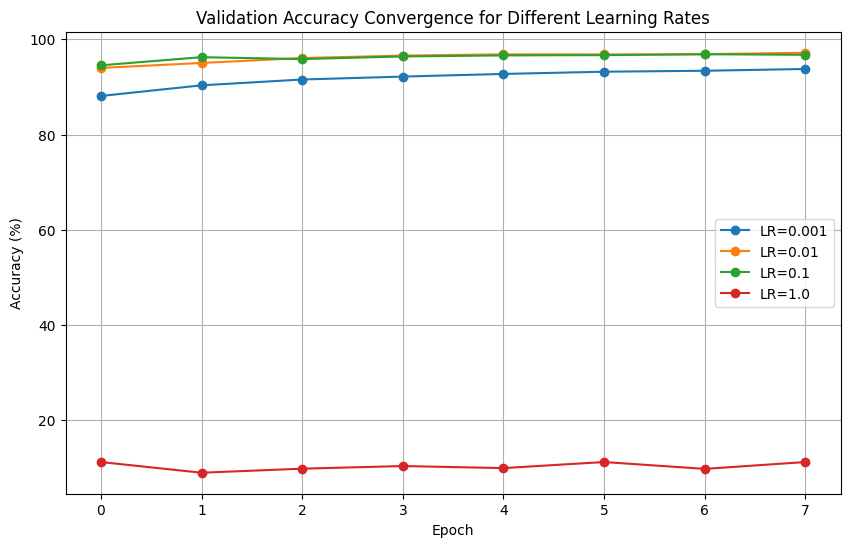

In [32]:
plt.figure(figsize=(10,6))
for lr, history in results_lr.items():
    plt.plot(history["val_acc"], marker='o', label=f"LR={lr}")
plt.title("Validation Accuracy Convergence for Different Learning Rates")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()



Results show that:
* **0.001** accuracy is stable (steady increase) but its loss is decreasing relatively slow.
* **0.01** accuracy is steadily increasing too, but loss is decreasing much faster than the previous one.
* **0.1** loss is approximately the same as 0.01, but it is noticed that between epoch 1 and 2 the accuracy is starting to oscillate, which indicates instability.
* **1.0** is both not accurate and doesn’t optimize the loss, indicating high overshooting.

#### batch sizes

In [33]:
batches = [16, 32, 64, 128]
results_batch = {}
for b in batches:
    print(f"\t * Training with batch size = {b} *")
    train_loss, val_loss, train_acc, val_acc, model = test_model_simpleFNN(l_r=0.01, b_size=b, hidden_sizes=[128,256], n_epochs=8)
    results_batch[b] = {
        "train_loss": train_loss,
        "val_loss": val_loss,
        "train_acc": train_acc,
        "val_acc": val_acc
    }

	 * Training with batch size = 16 *
Epoch [1/8], Train Loss: 0.2579, Train Acc: 91.89%, Val Loss: 0.1493, Val Acc: 95.49%
Epoch [2/8], Train Loss: 0.1134, Train Acc: 96.40%, Val Loss: 0.1219, Val Acc: 96.22%
Epoch [3/8], Train Loss: 0.0756, Train Acc: 97.56%, Val Loss: 0.1055, Val Acc: 96.89%
Epoch [4/8], Train Loss: 0.0564, Train Acc: 98.24%, Val Loss: 0.0993, Val Acc: 96.97%
Epoch [5/8], Train Loss: 0.0416, Train Acc: 98.68%, Val Loss: 0.1008, Val Acc: 97.19%
Epoch [6/8], Train Loss: 0.0294, Train Acc: 99.03%, Val Loss: 0.1018, Val Acc: 97.20%
Epoch [7/8], Train Loss: 0.0232, Train Acc: 99.21%, Val Loss: 0.1073, Val Acc: 97.29%
Epoch [8/8], Train Loss: 0.0182, Train Acc: 99.42%, Val Loss: 0.0990, Val Acc: 97.50%
	 * Training with batch size = 32 *
Epoch [1/8], Train Loss: 0.2957, Train Acc: 91.06%, Val Loss: 0.1531, Val Acc: 95.31%
Epoch [2/8], Train Loss: 0.1232, Train Acc: 96.22%, Val Loss: 0.1189, Val Acc: 96.32%
Epoch [3/8], Train Loss: 0.0862, Train Acc: 97.35%, Val Loss: 0.1069

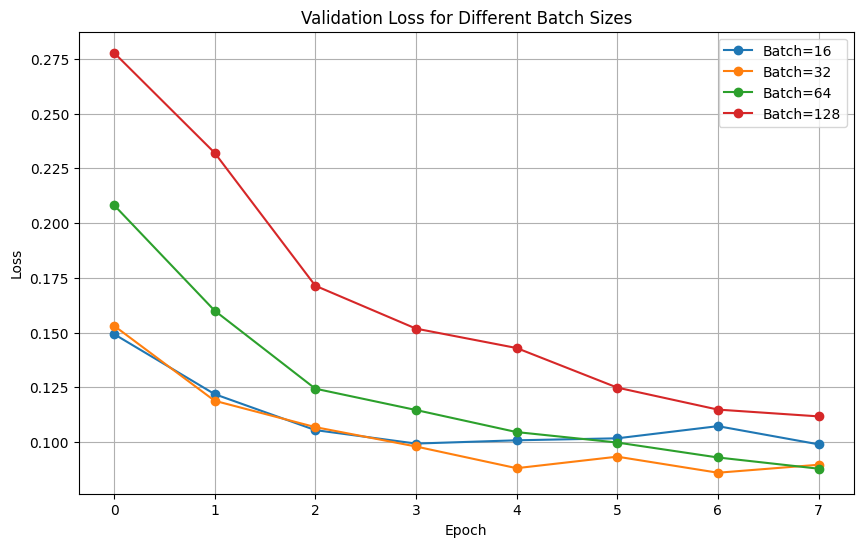

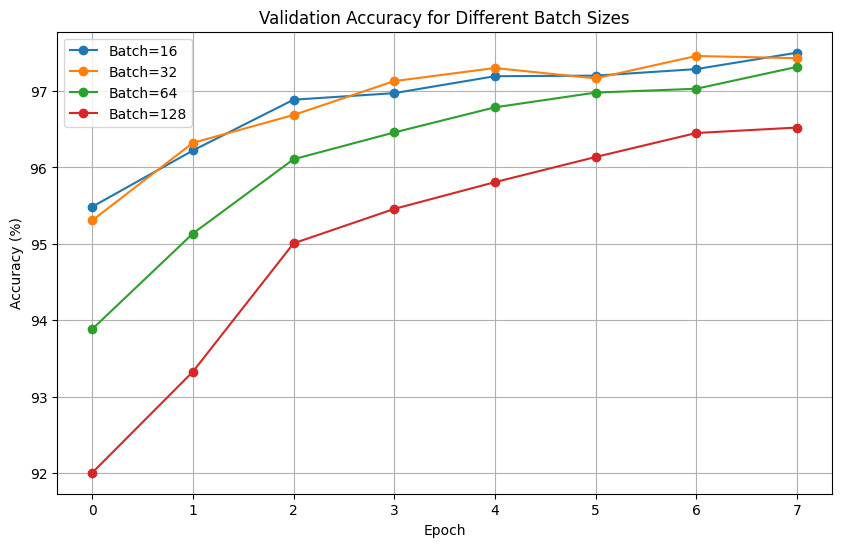

In [34]:
plt.figure(figsize=(10,6))
for b, history in results_batch.items():
    plt.plot(history["val_loss"], marker='o', label=f"Batch={b}")
plt.title("Validation Loss for Different Batch Sizes")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
for b, history in results_batch.items():
    plt.plot(history["val_acc"], marker='o', label=f"Batch={b}")
plt.title("Validation Accuracy for Different Batch Sizes")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()



Results show that:
* **smaller batches(16,32)** has more gradient noise as the loss value is oscillating but in terms of accuracy performed better than others
* **64** less accuracy but very close to smaller batches while waaaaaay more steady gradient with minimum fluctutions in the loss
* **128** steady gradient where loss is always decreasing but slightly lower loss and accuracy optimization as it is more "careful" so slow 

#### Architecture

In [45]:
import time

architectures = {
    "A_[64,64]": [64, 64],
    "B_[128,128]": [128, 128],
    "C_[256,128]": [256, 128],
    "D_[128,256,128]": [128, 256, 128],
    "E_[256,256,128,64]": [256, 256, 128, 64],
    "F_[512,256,128,64,32]": [512, 256, 128, 64, 32]
}

results_arch = {}

for name, arch in architectures.items():
    print(f"\t * Training {name} *")
    start_time = time.time()

    train_loss, val_loss, train_acc, val_acc, model = test_model_simpleFNN(
        l_r=0.01,
        b_size=64,
        hidden_sizes=arch,
        n_epochs=8
    )

    elapsed_time = time.time() - start_time

    results_arch[name] = {
        "train_loss": train_loss,
        "val_loss": val_loss,
        "train_acc": train_acc,
        "val_acc": val_acc,
        "model": model,
        "time": elapsed_time
    }


	 * Training A_[64,64] *
Epoch [1/8], Train Loss: 0.4353, Train Acc: 87.08%, Val Loss: 0.2736, Val Acc: 91.69%
Epoch [2/8], Train Loss: 0.2047, Train Acc: 94.04%, Val Loss: 0.1870, Val Acc: 94.59%
Epoch [3/8], Train Loss: 0.1517, Train Acc: 95.46%, Val Loss: 0.1560, Val Acc: 95.38%
Epoch [4/8], Train Loss: 0.1229, Train Acc: 96.26%, Val Loss: 0.1383, Val Acc: 95.76%
Epoch [5/8], Train Loss: 0.1006, Train Acc: 97.02%, Val Loss: 0.1330, Val Acc: 95.84%
Epoch [6/8], Train Loss: 0.0877, Train Acc: 97.25%, Val Loss: 0.1217, Val Acc: 96.37%
Epoch [7/8], Train Loss: 0.0747, Train Acc: 97.71%, Val Loss: 0.1207, Val Acc: 96.29%
Epoch [8/8], Train Loss: 0.0653, Train Acc: 97.98%, Val Loss: 0.1230, Val Acc: 96.36%
	 * Training B_[128,128] *
Epoch [1/8], Train Loss: 0.3820, Train Acc: 88.85%, Val Loss: 0.2238, Val Acc: 93.42%
Epoch [2/8], Train Loss: 0.1730, Train Acc: 94.83%, Val Loss: 0.1610, Val Acc: 95.34%
Epoch [3/8], Train Loss: 0.1249, Train Acc: 96.27%, Val Loss: 0.1515, Val Acc: 95.42%
Ep

In [ ]:
from tabulate import tabulate

summary = []

for name, info in results_arch.items():
    model = info["model"] 
    params = sum(p.numel() for p in model.parameters())
    final_acc = info["val_acc"][-1]
    final_loss = info["val_loss"][-1]
    elapsed = info["time"]

    summary.append([
        name,
        len(list(model.hidden_layers)),
        f"{params:,}",
        f"{final_acc:.2f}",
        f"{final_loss:.4f}",
        f"{elapsed:.1f}"
    ])

headers = ["Model", "Hidden Layers", "Params", "Final Val Acc (%)", "Final Val Loss", "Train Time (s)"]
print(tabulate(summary, headers=headers, tablefmt="github"))


| Model                 |   Hidden Layers | Params   |   Final Val Acc (%) |   Final Val Loss |   Train Time (s) |
|-----------------------|-----------------|----------|---------------------|------------------|------------------|
| A_[64,64]             |               2 | 55,050   |               96.36 |           0.123  |             49.8 |
| B_[128,128]           |               2 | 118,282  |               97.11 |           0.0969 |             50.3 |
| C_[256,128]           |               2 | 235,146  |               97.29 |           0.0901 |             51.8 |
| D_[128,256,128]       |               3 | 167,690  |               97.27 |           0.0943 |             51.9 |
| E_[256,256,128,64]    |               4 | 308,554  |               97.21 |           0.1051 |             55.6 |
| F_[512,256,128,64,32] |               5 | 576,810  |               97.39 |           0.1073 |             61.3 |



Results show that:
* **B,C,D** stable(loss is small) and high accuracy while maintaining a moderate number of params
* **A** small model with very acceptable performance
* **E and F** Much larger models with large number of parameters (higher computation cost) with marginal improvement in accuracy compared to other models and potential instability indicated by relatively higher loss 

I will choose D as it has that moderate spot between params count and performance and stability

### C2 Model Comparison

In [ ]:
_, _, _,_, model_nn, test_loss, test_acc, test_y_true, test_y_pred = test_model_simpleFNN(l_r=0.01, b_size=64, hidden_sizes=[128,256,128], n_epochs=12 , testing=True)



Epoch [1/12], Train Loss: 0.3494, Train Acc: 89.58%, Val Loss: 0.1855, Val Acc: 94.26%
Epoch [2/12], Train Loss: 0.1432, Train Acc: 95.72%, Val Loss: 0.1392, Val Acc: 95.54%
Epoch [3/12], Train Loss: 0.1024, Train Acc: 96.89%, Val Loss: 0.1232, Val Acc: 96.30%
Epoch [4/12], Train Loss: 0.0747, Train Acc: 97.73%, Val Loss: 0.1092, Val Acc: 96.66%
Epoch [5/12], Train Loss: 0.0587, Train Acc: 98.15%, Val Loss: 0.1032, Val Acc: 97.01%
Epoch [6/12], Train Loss: 0.0484, Train Acc: 98.51%, Val Loss: 0.0906, Val Acc: 97.26%
Epoch [7/12], Train Loss: 0.0370, Train Acc: 98.85%, Val Loss: 0.1081, Val Acc: 96.87%
Epoch [8/12], Train Loss: 0.0307, Train Acc: 99.08%, Val Loss: 0.0866, Val Acc: 97.60%
Epoch [9/12], Train Loss: 0.0238, Train Acc: 99.31%, Val Loss: 0.0887, Val Acc: 97.50%
Epoch [10/12], Train Loss: 0.0171, Train Acc: 99.53%, Val Loss: 0.0879, Val Acc: 97.40%
Epoch [11/12], Train Loss: 0.0119, Train Acc: 99.70%, Val Loss: 0.0940, Val Acc: 97.39%
Epoch [12/12], Train Loss: 0.0097, Train 

In [56]:
# Convert lists or tensors to CPU tensors (just in case they are on GPU)
y_true = torch.tensor(test_y_true).cpu()
y_pred = torch.tensor(test_y_pred).cpu()

# Initialize 10x10 matrix for MNIST classes
confusion_matrix = torch.zeros((10, 10), dtype=torch.int64)

# Fill the confusion matrix
for label, pred in zip(y_true, y_pred):
    confusion_matrix[label.long(), pred.long()] += 1

print("\nConfusion Matrix:")
print(confusion_matrix)

# Compute per-class accuracy
correct_per_class = confusion_matrix.diag()
total_per_class = confusion_matrix.sum(dim=1)
per_class_accuracy = correct_per_class.float() / (total_per_class.float() + 1e-6)

print("\n--- Per-Class Accuracy ---")
for i in range(10):
    print(f"Class {i}: {per_class_accuracy[i] * 100:.2f}%")
    
print(f"\nFinal Test Accuracy: {test_acc[-1]:.2f}% ")



Confusion Matrix:
tensor([[1366,    0,    4,    2,    1,    1,    0,    1,    1,    4],
        [   1, 1560,    3,    2,    0,    0,    0,    4,    3,    2],
        [   2,    8, 1364,    3,    5,    0,    2,   11,    2,    1],
        [   0,    1,    9, 1366,    0,   32,    0,   11,    9,    1],
        [   1,    2,    1,    0, 1331,    0,    2,    1,    1,   26],
        [   5,    0,    1,    6,    0, 1230,    4,    0,   10,    7],
        [   7,    3,    1,    0,    9,   10, 1344,    0,    1,    0],
        [   1,    3,    7,    4,    4,    3,    0, 1418,    3,   16],
        [   4,    7,    4,    8,    2,    9,    1,    2, 1319,    9],
        [   1,    2,    0,    3,    7,    6,    1,    6,    2, 1363]])

--- Per-Class Accuracy ---
Class 0: 98.99%
Class 1: 99.05%
Class 2: 97.57%
Class 3: 95.59%
Class 4: 97.51%
Class 5: 97.39%
Class 6: 97.75%
Class 7: 97.19%
Class 8: 96.63%
Class 9: 97.99%

Final Test Accuracy: 97.58% 


```
Confusion Matrix (logistic regression)
                     Predicted
                    NEG (0) | POS (1)
---------------------------------------
Actual NEG (0) |   1377   |    4   
---------------------------------------
Actual POS (1) |    3     |   1572 
---------------------------------------

Accuracy from CM: 99.76%
```
---

```
Confusion Matrix (softmax regression)
tensor([[1332,    0,    7,    3,    2,    9,    9,    1,   15,    2],
        [   1, 1525,    6,    8,    1,   10,    1,    3,   18,    2],
        [  11,   12, 1225,   24,   28,    2,   26,   27,   31,   12],
        [   8,   12,   25, 1256,    3,   48,   10,   25,   31,   11],
        [   3,    9,    6,    3, 1259,    0,   13,    4,   10,   58],
        [  19,   10,   16,   42,   11, 1072,   32,    6,   41,   14],
        [  13,    4,   12,    1,    8,   15, 1308,    3,   11,    0],
        [   8,   12,   16,    9,   11,    1,    0, 1345,    5,   52],
        [  16,   36,   15,   31,    8,   36,   13,   12, 1184,   14],
        [  12,    6,    8,   19,   58,    9,    3,   42,   10, 1224]])

--- Per-Class Accuracy ---
Class 0: 96.52%
Class 1: 96.83%
Class 2: 87.63%
Class 3: 87.89%
Class 4: 92.23%
Class 5: 84.88%
Class 6: 95.13%
Class 7: 92.19%
Class 8: 86.74%
Class 9: 87.99%

Final Test Accuracy: 90.93%
```
---
```
Confusion Matrix(Newral Network):
tensor([[1366,    0,    4,    2,    1,    1,    0,    1,    1,    4],
        [   1, 1560,    3,    2,    0,    0,    0,    4,    3,    2],
        [   2,    8, 1364,    3,    5,    0,    2,   11,    2,    1],
        [   0,    1,    9, 1366,    0,   32,    0,   11,    9,    1],
        [   1,    2,    1,    0, 1331,    0,    2,    1,    1,   26],
        [   5,    0,    1,    6,    0, 1230,    4,    0,   10,    7],
        [   7,    3,    1,    0,    9,   10, 1344,    0,    1,    0],
        [   1,    3,    7,    4,    4,    3,    0, 1418,    3,   16],
        [   4,    7,    4,    8,    2,    9,    1,    2, 1319,    9],
        [   1,    2,    0,    3,    7,    6,    1,    6,    2, 1363]])

--- Per-Class Accuracy ---
Class 0: 98.99%
Class 1: 99.05%
Class 2: 97.57%
Class 3: 95.59%
Class 4: 97.51%
Class 5: 97.39%
Class 6: 97.75%
Class 7: 97.19%
Class 8: 96.63%
Class 9: 97.99%

Final Test Accuracy: 97.58%
```


| Model                            | Task Type               | Accuracy (%) | Complexity | Training Time       | 
| -------------------------------- | ----------------------- | ------------ | ---------- | ------------------- | 
| Logistic Regression              | Binary (0 vs 1)         | **99.76%**   | ( O(n * d) )         | Fast (42 Sec/30Epochs)     | 
| Softmax Regression               | Multi-class (10 digits) | **90.93%**   | ( O(n * d * k) )   | Moderate (163 Sec/30Epochs) | 
| Neural Network (3 hidden layers) | Multi-class             | **97.58%**   | ( O(n * d * (params) * k) )       | Slow (~230 Sec/30Epochs)     |

**params = (neurons of one hidden layer * neuron of next layer) for all layer** <br>
**n= number of training samples** <br>
**d = dimension of a sample** <br>
**k = number of classes** <br>

**From prev Results:**
* logistic regression performed exceptionally well as 1 and 0 are binary and mostly linearaly separable with significantly lower computations and training time
* softmax regression struggled (90% accuracy) with non-linear data that may have high similarities evident from confusion matrix like :
    - 2 VS 8
    - 3 VS 5
    - 4 VS 9

* while neural network had high accuracy with non linear data and very low misclassification rate for each class, It required significantly more training and tuning time 

**when to use each:**
* use **logistic regression** for simple binary class classification and linearaly separable data
* use **softmax regression** for multiclass classification that requires fast training time and low model complexity
* use **neural networks** if model complexity and training time is irrelevant *or* when softmax refression performed lower than accuracy requirements as this indicated high non-linearity in training data which neural networks perform best with





Part D: Advanced Techniques